<a href="https://colab.research.google.com/github/ras-internship/colabs/blob/main/Alim%20Fedoseev/prophet_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from prophet import Prophet

In [8]:
df = pd.read_excel('https://github.com/ras-internship/data/blob/main/vvp-infl.xlsx?raw=true')
df.head()

,Date,infl,VVP
0,1995-01-01,118.0,395.54
1,1995-02-01,111.0,395.54
2,1995-03-01,109.0,395.54
3,1995-04-01,108.5,395.54
4,1995-05-01,107.9,395.54


In [9]:
df.tail()

,Date,infl,VVP
331,2022-08-01,99.5,2 130.01
332,2022-09-01,100.1,2 130.02
333,2022-10-01,100.2,2 130.03
334,2022-11-01,100.4,2 130.04
335,2022-12-01,100.8,2 130.05


In [45]:
df_infl = df.iloc[:, [0, 1]].copy()
df_infl.columns = ['ds', 'y']
df_infl


,ds,y
0,1995-01-01,118.0
1,1995-02-01,111.0
2,1995-03-01,109.0
3,1995-04-01,108.5
4,1995-05-01,107.9
...,...,...
331,2022-08-01,99.5
332,2022-09-01,100.1
333,2022-10-01,100.2
334,2022-11-01,100.4


In [46]:
m = Prophet()
m.fit(df_infl)
future = m.make_future_dataframe(periods=10, freq='M')
future.tail(11)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfr7in64/8qsa_n_o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdfr7in64/zli_qvht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19909', 'data', 'file=/tmp/tmpdfr7in64/8qsa_n_o.json', 'init=/tmp/tmpdfr7in64/zli_qvht.json', 'output', 'file=/tmp/tmpdfr7in64/prophet_modelymseji4f/prophet_model-20230407124704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:47:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:47:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
335,2022-12-01
336,2022-12-31
337,2023-01-31
338,2023-02-28
339,2023-03-31
340,2023-04-30
341,2023-05-31
342,2023-06-30
343,2023-07-31
344,2023-08-31


In [49]:
forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11))

            ds        yhat  yhat_lower  yhat_upper
335 2022-12-01  100.697896   97.741297  103.521797
336 2022-12-31  101.949589   98.940579  105.064042
337 2023-01-31  100.009206   97.112885  103.051181
338 2023-02-28  101.558170   98.633664  104.336522
339 2023-03-31  100.627573   97.779115  103.547929
340 2023-04-30  100.232419   97.146435  103.097789
341 2023-05-31   99.312870   96.387704  102.338972
342 2023-06-30   99.566383   96.632169  102.454159
343 2023-07-31   99.384890   96.326720  102.307395
344 2023-08-31  103.327324  100.548344  106.023165
345 2023-09-30   99.428265   96.681121  102.316016


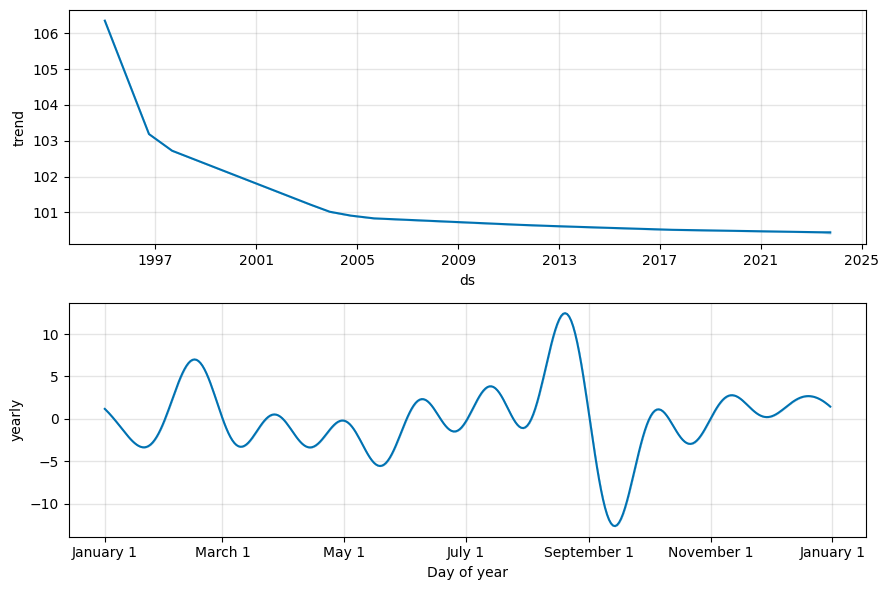

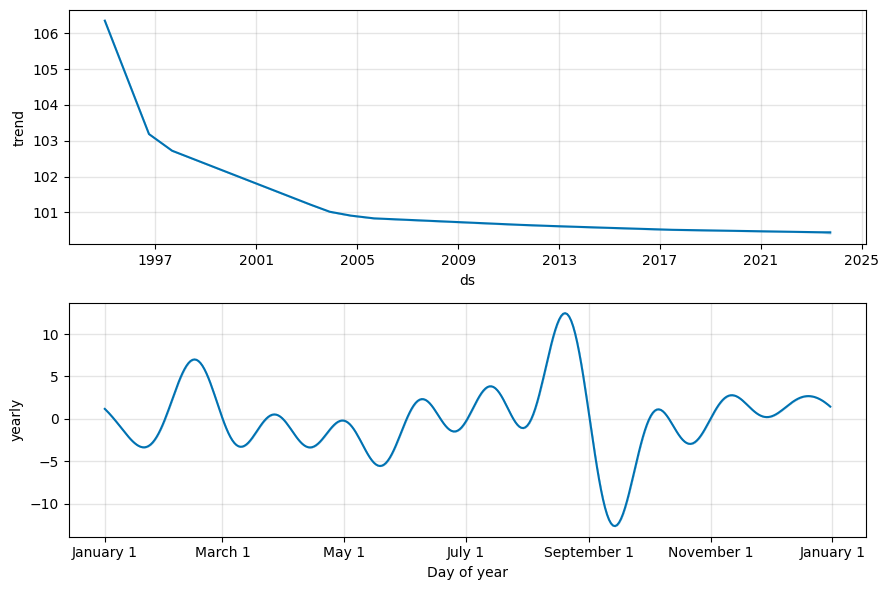

In [48]:
m.plot_components(forecast)
